## Analysis of Bruton’s tyrosine kinase (BTK) inhibitors from CHEMBL

## Reference: 

1. This analysis is inspired by [TeachopenCADD Tutorials](https://volkamerlab.org/projects/teachopencadd/). [Github link of TeachopenCADD](https://github.com/volkamerlab/TeachOpenCADD)
2. Nice introduction to CHEMBL API [here](https://mybinder.org/v2/gh/chembl/chembl_webresource_client/138bf286734aef30f53c5f959629339f1ac61d1c)

In [1]:
## Loading Python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from pathlib import Path

## Loading Chem-related Python modules
from rdkit.Chem import PandasTools
from chembl_webresource_client.new_client import new_client
from tqdm.auto import tqdm

In [2]:
# Noting start time
import time
start = time.time()

In [3]:
# Setting Path of working directory

In [4]:
HERE = Path(_dh[-1])
DATA = HERE / "data"

In [5]:
HERE

PosixPath('/home/mandar/Dropbox/kinase_project/BTK_inhibitors/cheminformatic_analysis')

In [6]:
## Setting up Chembl webclient objects
targets_api = new_client.target
compounds_api = new_client.molecule
bioactivities_api = new_client.activity

In [7]:
type(targets_api)

chembl_webresource_client.query_set.QuerySet

# Target: BTK
* UniProt ID of BTK:[Q06187](http://www.uniprot.org/uniprot/Q06187) from [UniProt website](https://www.uniprot.org/)

In [8]:
uniprot_id = "Q06187"

#### Fetch target data from ChEMBL

In [9]:
# Get target information from ChEMBL but restrict it to specified values only
targets = targets_api.get(target_components__accession=uniprot_id).only(
    "target_chembl_id", "organism", "pref_name", "target_type"
)
print(f'The type of the targets is "{type(targets)}"')

The type of the targets is "<class 'chembl_webresource_client.query_set.QuerySet'>"


In [10]:
targets

[{'organism': 'Homo sapiens', 'pref_name': 'Tyrosine-protein kinase BTK', 'target_chembl_id': 'CHEMBL5251', 'target_type': 'SINGLE PROTEIN'}, {'organism': 'Homo sapiens', 'pref_name': 'TEC family kinase', 'target_chembl_id': 'CHEMBL4296642', 'target_type': 'PROTEIN FAMILY'}, {'organism': 'Homo sapiens', 'pref_name': 'Protein cereblon/Tyrosine-protein kinase BTK', 'target_chembl_id': 'CHEMBL4523704', 'target_type': 'PROTEIN-PROTEIN INTERACTION'}, {'organism': 'Homo sapiens', 'pref_name': 'VHL/Tyrosine-protein kinase BTK', 'target_chembl_id': 'CHEMBL4630740', 'target_type': 'PROTEIN-PROTEIN INTERACTION'}]

In [11]:
df_targets = pd.DataFrame.from_records(targets)
df_targets

,organism,pref_name,target_chembl_id,target_type
0,Homo sapiens,Tyrosine-protein kinase BTK,CHEMBL5251,SINGLE PROTEIN
1,Homo sapiens,Tyrosine-protein kinase BTK,CHEMBL5251,SINGLE PROTEIN
2,Homo sapiens,TEC family kinase,CHEMBL4296642,PROTEIN FAMILY
3,Homo sapiens,Protein cereblon/Tyrosine-protein kinase BTK,CHEMBL4523704,PROTEIN-PROTEIN INTERACTION
4,Homo sapiens,VHL/Tyrosine-protein kinase BTK,CHEMBL4630740,PROTEIN-PROTEIN INTERACTION


# Chosing CHEMBL5251

In [12]:
target = df_targets.iloc[0]
target

organism                           Homo sapiens
pref_name           Tyrosine-protein kinase BTK
target_chembl_id                     CHEMBL5251
target_type                      SINGLE PROTEIN
Name: 0, dtype: object

In [13]:
chembl_id = target.target_chembl_id
print(f"The target ChEMBL ID is {chembl_id}")

The target ChEMBL ID is CHEMBL5251


# Getting activity

In [14]:
bioactivities = bioactivities_api.filter(target_chembl_id=chembl_id, type="IC50", relation="=", assay_type="B"
).only("activity_id", "assay_chembl_id", "assay_description",
    "assay_type",
    "molecule_chembl_id",
    "type",
    "standard_units",
    "relation",
    "standard_value",
    "target_chembl_id",
    "target_organism",
)

print(f"Length and type of bioactivities object: {len(bioactivities)}, {type(bioactivities)}")

Length and type of bioactivities object: 3816, <class 'chembl_webresource_client.query_set.QuerySet'>


In [15]:
df_activity = pd.DataFrame.from_records(bioactivities)
df_activity.head()

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type,units,value
0,1173948,CHEMBL648220,Inhibition of Brutons tyrosine kinase,B,CHEMBL281957,=,nM,0.4,CHEMBL5251,Homo sapiens,IC50,uM,0.0004
1,1173948,CHEMBL648220,Inhibition of Brutons tyrosine kinase,B,CHEMBL281957,=,nM,0.4,CHEMBL5251,Homo sapiens,IC50,uM,0.0004
2,1712362,CHEMBL861964,Inhibition of BTK,B,CHEMBL207028,=,nM,15100.0,CHEMBL5251,Homo sapiens,IC50,uM,15.1
3,1713430,CHEMBL861964,Inhibition of BTK,B,CHEMBL377085,=,nM,4100.0,CHEMBL5251,Homo sapiens,IC50,uM,4.1
4,1734751,CHEMBL865400,Inhibition of Btk,B,CHEMBL209148,=,nM,4100.0,CHEMBL5251,Homo sapiens,IC50,uM,4.1


In [16]:
df_activity["units"].unique()

array(['uM', 'nM', "10'-8M", '10^-8M'], dtype=object)

In [17]:
df_activity.drop(["units", "value"], axis=1, inplace=True)
df_activity.head()

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type
0,1173948,CHEMBL648220,Inhibition of Brutons tyrosine kinase,B,CHEMBL281957,=,nM,0.4,CHEMBL5251,Homo sapiens,IC50
1,1173948,CHEMBL648220,Inhibition of Brutons tyrosine kinase,B,CHEMBL281957,=,nM,0.4,CHEMBL5251,Homo sapiens,IC50
2,1712362,CHEMBL861964,Inhibition of BTK,B,CHEMBL207028,=,nM,15100.0,CHEMBL5251,Homo sapiens,IC50
3,1713430,CHEMBL861964,Inhibition of BTK,B,CHEMBL377085,=,nM,4100.0,CHEMBL5251,Homo sapiens,IC50
4,1734751,CHEMBL865400,Inhibition of Btk,B,CHEMBL209148,=,nM,4100.0,CHEMBL5251,Homo sapiens,IC50


In [18]:
df_activity = df_activity.astype({"standard_value": "float64"})
df_activity.dtypes

activity_id             int64
assay_chembl_id        object
assay_description      object
assay_type             object
molecule_chembl_id     object
relation               object
standard_units         object
standard_value        float64
target_chembl_id       object
target_organism        object
type                   object
dtype: object

In [19]:
df_activity.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {df_activity.shape}")

DataFrame shape: (3817, 11)


**3. Keep only entries with "standard_unit == nM"** 

We only want to keep bioactivity entries in `nM`, thus we remove all entries with other units.

In [20]:
print(f"Units in downloaded data: {df_activity['standard_units'].unique()}")
print(
    f"Number of non-nM entries:\
    {df_activity[df_activity['standard_units'] != 'nM'].shape[0]}"
)

Units in downloaded data: ['nM']
Number of non-nM entries:    0


In [21]:
df_activity = df_activity[df_activity["standard_units"] == "nM"]
print(f"Units after filtering: {df_activity['standard_units'].unique()}")

Units after filtering: ['nM']


In [22]:
print(f"DataFrame shape: {df_activity.shape}")

DataFrame shape: (3817, 11)


**4. Delete duplicate molecules**

Sometimes the same molecule (`molecule_chembl_id`) has been tested more than once, in this case, we only keep the first one.

Note other choices could be to keep the one with the best value or a mean value of all assay results for the respective compound.

In [23]:
df_activity.drop_duplicates("molecule_chembl_id", keep="first", inplace=True)
print(f"DataFrame shape: {df_activity.shape}")

DataFrame shape: (2754, 11)


**5. Reset "DataFrame" index**

Since we deleted some rows, but we want to iterate over the index later, we reset the index to be continuous.

In [24]:
df_activity.reset_index(drop=True, inplace=True)
df_activity.head()

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type
0,1173948,CHEMBL648220,Inhibition of Brutons tyrosine kinase,B,CHEMBL281957,=,nM,0.4,CHEMBL5251,Homo sapiens,IC50
1,1712362,CHEMBL861964,Inhibition of BTK,B,CHEMBL207028,=,nM,15100.0,CHEMBL5251,Homo sapiens,IC50
2,1713430,CHEMBL861964,Inhibition of BTK,B,CHEMBL377085,=,nM,4100.0,CHEMBL5251,Homo sapiens,IC50
3,1734751,CHEMBL865400,Inhibition of Btk,B,CHEMBL209148,=,nM,4100.0,CHEMBL5251,Homo sapiens,IC50
4,1748681,CHEMBL870355,Inhibition of Btk,B,CHEMBL386760,=,nM,100.0,CHEMBL5251,Homo sapiens,IC50


**6. Rename columns**

In [25]:
df_activity.rename(
    columns={"standard_value": "IC50", "standard_units": "units"}, inplace=True
)
df_activity.head()

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,units,IC50,target_chembl_id,target_organism,type
0,1173948,CHEMBL648220,Inhibition of Brutons tyrosine kinase,B,CHEMBL281957,=,nM,0.4,CHEMBL5251,Homo sapiens,IC50
1,1712362,CHEMBL861964,Inhibition of BTK,B,CHEMBL207028,=,nM,15100.0,CHEMBL5251,Homo sapiens,IC50
2,1713430,CHEMBL861964,Inhibition of BTK,B,CHEMBL377085,=,nM,4100.0,CHEMBL5251,Homo sapiens,IC50
3,1734751,CHEMBL865400,Inhibition of Btk,B,CHEMBL209148,=,nM,4100.0,CHEMBL5251,Homo sapiens,IC50
4,1748681,CHEMBL870355,Inhibition of Btk,B,CHEMBL386760,=,nM,100.0,CHEMBL5251,Homo sapiens,IC50


In [26]:
print(f"DataFrame shape: {df_activity.shape}")

DataFrame shape: (2754, 11)


We now have a set of **2754** molecule ids with respective IC50 values for our target kinase.

In [27]:
compounds_provider = compounds_api.filter(
    molecule_chembl_id__in=list(df_activity["molecule_chembl_id"])
).only("molecule_chembl_id", "molecule_structures")

In [28]:
compounds = list(tqdm(compounds_provider))

  0%|          | 0/2754 [00:00<?, ?it/s]

In [29]:
compounds_df = pd.DataFrame.from_records(
    compounds,
)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (2754, 2)


In [30]:
compounds_df.head()

,molecule_chembl_id,molecule_structures
0,CHEMBL58,{'canonical_smiles': 'O=C1c2c(O)ccc(O)c2C(=O)c...
1,CHEMBL281957,{'canonical_smiles': 'CCN(CC)C/C=C/c1nc(O)c2c(...
2,CHEMBL31965,{'canonical_smiles': 'C=CC(=O)Nc1cc2c(Nc3ccc(F...
3,CHEMBL285063,{'canonical_smiles': 'C=CC(=O)Nc1ccc2ncnc(Nc3c...
4,CHEMBL288441,{'canonical_smiles': 'COc1cc(Nc2c(C#N)cnc3cc(O...


#### Preprocess and filter compound data

1. Remove entries with missing entries
2. Delete duplicate molecules (by molecule_chembl_id)
3. Get molecules with canonical SMILES

**1. Remove entries with missing molecule structure entry**

In [31]:
compounds_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (2750, 2)


**2. Delete duplicate molecules**

In [32]:
compounds_df.drop_duplicates("molecule_chembl_id", keep="first", inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (2750, 2)


**3. Get molecules with canonical SMILES**

So far, we have multiple different molecular structure representations. We only want to keep the canonical SMILES.

In [33]:
compounds_df.iloc[0].molecule_structures.keys()

dict_keys(['canonical_smiles', 'molfile', 'standard_inchi', 'standard_inchi_key'])

In [34]:
canonical_smiles = []

for i, compounds in compounds_df.iterrows():
    try:
        canonical_smiles.append(compounds["molecule_structures"]["canonical_smiles"])
    except KeyError:
        canonical_smiles.append(None)

compounds_df["smiles"] = canonical_smiles
compounds_df.drop("molecule_structures", axis=1, inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (2750, 2)


Sanity check: Remove all molecules without a canonical SMILES string.

In [35]:
compounds_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (2750, 2)


### Output (bioactivity-compound) data
**Summary of compound and bioactivity data**

In [36]:
print(f"Bioactivities filtered: {df_activity.shape[0]}")
df_activity.columns

Bioactivities filtered: 2754


Index(['activity_id', 'assay_chembl_id', 'assay_description', 'assay_type',
       'molecule_chembl_id', 'relation', 'units', 'IC50', 'target_chembl_id',
       'target_organism', 'type'],
      dtype='object')

In [37]:
print(f"Compounds filtered: {compounds_df.shape[0]}")
compounds_df.columns

Compounds filtered: 2750


Index(['molecule_chembl_id', 'smiles'], dtype='object')

#### Merge both datasets

Merge values of interest from `df_activity` and `compounds_df` in an `output_df` based on the compounds' ChEMBL IDs (`molecule_chembl_id`), keeping the following columns:

* ChEMBL IDs: `molecule_chembl_id`
* SMILES: `smiles`
* units: `units`
* IC50: `IC50`

In [38]:
# Merge DataFrames
output_df = pd.merge(
    df_activity[["molecule_chembl_id", "IC50", "units"]],
    compounds_df,
    on="molecule_chembl_id",
)

# Reset row indices
output_df.reset_index(drop=True, inplace=True)

print(f"Dataset with {output_df.shape[0]} entries.")

Dataset with 2750 entries.


In [39]:
output_df.dtypes

molecule_chembl_id     object
IC50                  float64
units                  object
smiles                 object
dtype: object

In [40]:
output_df.head(10)

,molecule_chembl_id,IC50,units,smiles
0,CHEMBL281957,0.4,nM,CCN(CC)C/C=C/c1nc(O)c2c(ccc3nc(Nc4c(Cl)cccc4Cl...
1,CHEMBL207028,15100.0,nM,NC(=O)c1sc(-c2ccccc2)cc1N
2,CHEMBL377085,4100.0,nM,Cc1cc(C)c2c(N)c(C(N)=O)sc2n1
3,CHEMBL209148,4100.0,nM,COc1cc(C)c(Sc2cnc(NC(=O)c3ccc(CNC(C)C(C)(C)C)c...
4,CHEMBL386760,100.0,nM,COc1ccc(N(C(=O)Oc2c(C)cccc2C)c2ccnc(Nc3cc(OC)c...
5,CHEMBL386661,3330.0,nM,CNc1ncc2cc(-c3cc(C(=O)Nc4cc(C(F)(F)F)ccc4OC4CC...
6,CHEMBL215943,545.0,nM,Cc1ccc(C(=O)Nc2cccc(C(F)(F)F)c2)cc1-c1ccc2nc(N...
7,CHEMBL373882,25000.0,nM,CNc1ncnc(-c2cccnc2Oc2ccc(F)c(C(=O)Nc3cc(C(F)(F...
8,CHEMBL246356,25000.0,nM,CNc1ncnc(-c2cccnc2Oc2cc(NC(=O)c3cccc(OC(F)(F)C...
9,CHEMBL249097,9.0,nM,Cc1ccc(O)cc1Nc1ccnc(Nc2cccc(C(N)=O)c2)n1


#### Add pIC50 values

As you can see the low IC50 values are difficult to read (values are distributed over multiple scales), which is why we convert the IC50 values to pIC50.

In [41]:
def convert_ic50_to_pic50(IC50_value):
    pIC50_value = 9 - math.log10(IC50_value)
    return pIC50_value

In [42]:
# Apply conversion to each row of the compounds DataFrame
output_df["pIC50"] = output_df.apply(lambda x: convert_ic50_to_pic50(x.IC50), axis=1)

In [43]:
output_df.head()

,molecule_chembl_id,IC50,units,smiles,pIC50
0,CHEMBL281957,0.4,nM,CCN(CC)C/C=C/c1nc(O)c2c(ccc3nc(Nc4c(Cl)cccc4Cl...,9.397940
1,CHEMBL207028,15100.0,nM,NC(=O)c1sc(-c2ccccc2)cc1N,4.821023
2,CHEMBL377085,4100.0,nM,Cc1cc(C)c2c(N)c(C(N)=O)sc2n1,5.387216
3,CHEMBL209148,4100.0,nM,COc1cc(C)c(Sc2cnc(NC(=O)c3ccc(CNC(C)C(C)(C)C)c...,5.387216
4,CHEMBL386760,100.0,nM,COc1ccc(N(C(=O)Oc2c(C)cccc2C)c2ccnc(Nc3cc(OC)c...,7.000000


#### Draw compound data

Let's have a look at our collected data set.

First, we plot the pIC50 value distribution

array([[<AxesSubplot:title={'center':'pIC50'}>]], dtype=object)

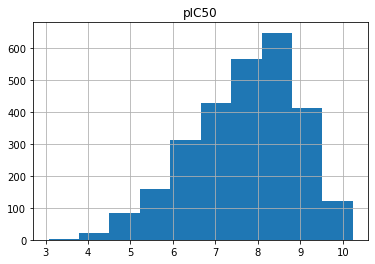

In [44]:
output_df.hist(column="pIC50")

In the next steps, we add a column for RDKit molecule objects to our `DataFrame` and look at the structures of the molecules with the highest pIC50 values. 

In [45]:
# Add molecule column
PandasTools.AddMoleculeColumnToFrame(output_df, smilesCol="smiles")

In [46]:
# Sort molecules by pIC50
output_df.sort_values(by="pIC50", ascending=False, inplace=True)

# Reset index
output_df.reset_index(drop=True, inplace=True)

Show the three most active molecules, i.e. molecules with the highest pIC50 values.

,molecule_chembl_id,IC50,units,pIC50,ROMol
0,CHEMBL4113670,0.058,nM,10.236572,
1,CHEMBL4648442,0.070,nM,10.154902,
2,CHEMBL4113445,0.075,nM,10.124939,

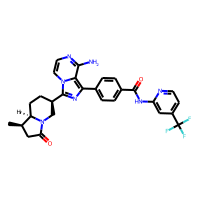
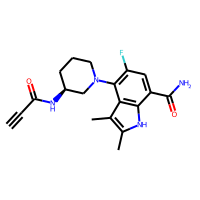
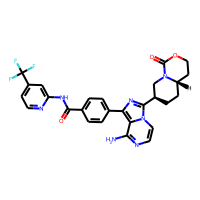

In [47]:
output_df.drop("smiles", axis=1).head(3)

In [48]:
# Prepare saving the dataset: Drop the ROMol column
output_df = output_df.drop("ROMol", axis=1)
print(f"DataFrame shape: {output_df.shape}")

DataFrame shape: (2750, 5)


In [49]:
print(f"DataFrame shape: {output_df.shape}")
# NBVAL_CHECK_OUTPUT

DataFrame shape: (2750, 5)


In [50]:
output_df.to_csv(DATA / "BTK_compounds.csv")
output_df.head()

,molecule_chembl_id,IC50,units,smiles,pIC50
0,CHEMBL4113670,0.058,nM,C[C@@H]1CC(=O)N2C[C@H](c3nc(-c4ccc(C(=O)Nc5cc(...,10.236572
1,CHEMBL4648442,0.070,nM,C#CC(=O)N[C@H]1CCCN(c2c(F)cc(C(N)=O)c3[nH]c(C)...,10.154902
2,CHEMBL4113445,0.075,nM,Nc1nccn2c([C@@H]3CC[C@H]4CCOC(=O)N4C3)nc(-c3cc...,10.124939
3,CHEMBL4240879,0.079,nM,C=CS(=O)(=O)Nc1cccc(-c2ccc(C(N)=O)c3[nH]c4c(c2...,10.102373
4,CHEMBL4109744,0.081,nM,Nc1nccn2c([C@@H]3CC[C@H]4C[C@H](O)C(=O)N4C3)nc...,10.091515


In [51]:
print(f"DataFrame shape: {output_df.shape}")
# NBVAL_CHECK_OUTPUT

DataFrame shape: (2750, 5)


## Quiz

In [52]:
end = time.time()
end
diff = end - start

In [53]:
print(f"Total time in seconds: {diff}")

Total time in seconds: 2.3695907592773438


# with _new_client.molecule_

### note: It did not work, but kept for reference.

In [54]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
mols = molecule.filter(molecule_chembl_id__in=['CHEMBL5251']).only(['molecule_chembl_id', 'pref_name'])
mols

[]

# with _new_client.activity_

## Note: This is same as [Getting-activity](#Getting-activity).

In [55]:
from chembl_webresource_client.new_client import new_client

activity = new_client.activity
res_ic50 = activity.filter(target_chembl_id='CHEMBL5251', type="IC50", relation="=", assay_type="B"
).only("activity_id", "assay_chembl_id", "assay_description",
    "assay_type",
    "molecule_chembl_id",
    "type",
    "standard_units",
    "relation",
    "standard_value",
    "target_chembl_id",
    "target_organism",
)

len(res_ic50)

3816

In [56]:
df_res = pd.DataFrame.from_records(res_ic50)
df_res.head()

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type,units,value
0,1173948,CHEMBL648220,Inhibition of Brutons tyrosine kinase,B,CHEMBL281957,=,nM,0.4,CHEMBL5251,Homo sapiens,IC50,uM,0.0004
1,1173948,CHEMBL648220,Inhibition of Brutons tyrosine kinase,B,CHEMBL281957,=,nM,0.4,CHEMBL5251,Homo sapiens,IC50,uM,0.0004
2,1712362,CHEMBL861964,Inhibition of BTK,B,CHEMBL207028,=,nM,15100.0,CHEMBL5251,Homo sapiens,IC50,uM,15.1
3,1713430,CHEMBL861964,Inhibition of BTK,B,CHEMBL377085,=,nM,4100.0,CHEMBL5251,Homo sapiens,IC50,uM,4.1
4,1734751,CHEMBL865400,Inhibition of Btk,B,CHEMBL209148,=,nM,4100.0,CHEMBL5251,Homo sapiens,IC50,uM,4.1


# Search for ADMET-related inhibitor assays (type A)

## with _new_client.assay_

In [57]:
from chembl_webresource_client.new_client import new_client
assay = new_client.assay
res_admet = assay.filter(target_chembl_id='CHEMBL5251',description__icontains='inhibit', assay_type='A')
res_admet

[{'assay_category': None, 'assay_cell_type': None, 'assay_chembl_id': 'CHEMBL4407571', 'assay_classifications': [], 'assay_organism': 'Homo sapiens', 'assay_parameters': [], 'assay_strain': None, 'assay_subcellular_fraction': None, 'assay_tax_id': 9606, 'assay_test_type': None, 'assay_tissue': None, 'assay_type': 'A', 'assay_type_description': 'ADME', 'bao_format': 'BAO_0000019', 'bao_label': 'assay format', 'cell_chembl_id': None, 'confidence_description': 'Direct single protein target assigned', 'confidence_score': 9, 'description': "Inhibition of full-length recombinant human His-tagged BTK cytoplasmic domain expressed in baculovirus expression system at 25 uM using FRET-labeled tyr 01 peptide as substrate measured after 1 hr by Z'-lyte assay relative to control", 'document_chembl_id': 'CHEMBL4406811', 'relationship_description': 'Direct protein target assigned', 'relationship_type': 'D', 'src_assay_id': None, 'src_id': 1, 'target_chembl_id': 'CHEMBL5251', 'tissue_chembl_id': None, 

In [58]:
df_res_assay = pd.DataFrame.from_records(res_admet)
df_res_assay.head()

,assay_category,assay_cell_type,assay_chembl_id,assay_classifications,assay_organism,assay_parameters,assay_strain,assay_subcellular_fraction,assay_tax_id,assay_test_type,...,confidence_score,description,document_chembl_id,relationship_description,relationship_type,src_assay_id,src_id,target_chembl_id,tissue_chembl_id,variant_sequence
0,None,None,CHEMBL4407571,[],Homo sapiens,[],None,None,9606,None,...,9,Inhibition of full-length recombinant human Hi...,CHEMBL4406811,Direct protein target assigned,D,None,1,CHEMBL5251,None,None
1,None,None,CHEMBL4407571,[],Homo sapiens,[],None,None,9606,None,...,9,Inhibition of full-length recombinant human Hi...,CHEMBL4406811,Direct protein target assigned,D,None,1,CHEMBL5251,None,None
2,None,None,CHEMBL4685326,[],Homo sapiens,[],None,None,9606,None,...,9,Inhibition of recombinant human His-tagged ful...,CHEMBL4680201,Direct protein target assigned,D,None,1,CHEMBL5251,None,None
3,None,None,CHEMBL4687850,[],Homo sapiens,[],None,None,9606,None,...,9,Inhibition of human BTK assessed as residual a...,CHEMBL4680285,Direct protein target assigned,D,None,1,CHEMBL5251,None,None
